# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [1]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

2025-09-14 12:48:48.666925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-14 12:48:49.367212: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-14 12:48:49.495455: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
## 0. Parameters <a name="parameters"></a>

In [3]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

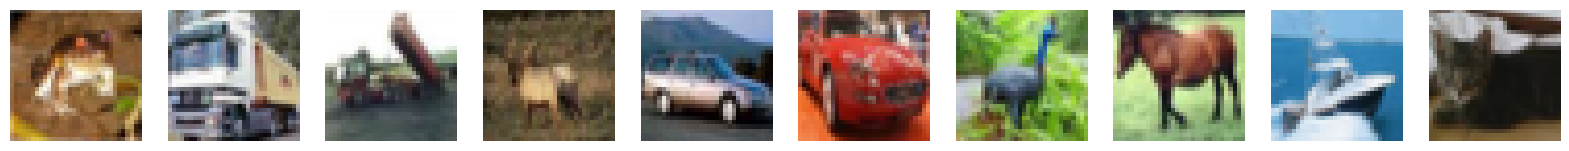

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
display(x_train[:10])
print(y_train[:10])

## 2. Build the model <a name="build"></a>

In [7]:
input_layer = layers.Input((32, 32, 3))

# First conv block
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Activation('sigmoid')(x)  # Changed from LeakyReLU to Sigmoid

# Second conv block
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('sigmoid')(x)  # Changed from LeakyReLU to Sigmoid

# Third conv block
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('sigmoid')(x)  # Changed from LeakyReLU to Sigmoid

# Fourth conv block
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('sigmoid')(x)  # Changed from LeakyReLU to Sigmoid

# Fifth conv block
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('sigmoid')(x)  # Changed from LeakyReLU to Sigmoid

# Sixth conv block
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('sigmoid')(x)  # Changed from LeakyReLU to Sigmoid

x = layers.Flatten()(x)

# Dense layers
x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('sigmoid')(x)  # Changed from LeakyReLU to Sigmoid
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

model.summary()

2025-09-14 12:48:59.407551: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (34)
2025-09-14 12:48:59.409863: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (43a23b07f5e8): /proc/driver/nvidia/version does not exist
2025-09-14 12:48:59.415985: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                             

## 3. Train the model <a name="train"></a>

In [8]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [9]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 [==============================] - 70s 43ms/step - loss: 1.8436 - accuracy: 0.3418 - val_loss: 2.5201 - val_accuracy: 0.2117
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5148 - accuracy: 0.4544 - val_loss: 1.7147 - val_accuracy: 0.3892
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3658 - accuracy: 0.5132 - val_loss: 1.2098 - val_accuracy: 0.5642
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2381 - accuracy: 0.5637 - val_loss: 1.3470 - val_accuracy: 0.5218
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1247 - accuracy: 0.6070 - val_loss: 1.3331 - val_accuracy: 0.5417
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0303 - accuracy: 0.6406 - val_loss: 1.2240 - val_accuracy: 0.5742
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9684 - accuracy: 0.6649 - val_loss: 1.2003 -

## 4. Evaluation <a name="evaluate"></a>

In [10]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 3s 291ms/step - loss: 1.2180 - accuracy: 0.5993


[1.2179818153381348, 0.5993000268936157]

In [11]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 5s 16ms/step


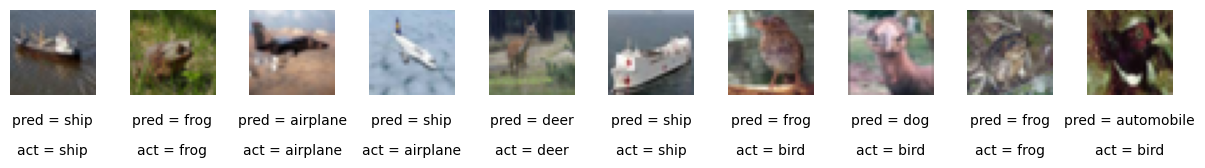

In [12]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)